In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [321]:
#Making the df
df = pd.read_csv(r'F:\Sem 6\DSA\Lab\datasets\Covid Data.csv', na_values = [97,98,99])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   USMER                 1048575 non-null  int64  
 1   MEDICAL_UNIT          1048575 non-null  int64  
 2   SEX                   1048575 non-null  int64  
 3   PATIENT_TYPE          1048575 non-null  int64  
 4   DATE_DIED             1048575 non-null  object 
 5   INTUBED               192706 non-null   float64
 6   PNEUMONIA             1032572 non-null  float64
 7   AGE                   1048230 non-null  float64
 8   PREGNANT              521310 non-null   float64
 9   DIABETES              1045237 non-null  float64
 10  COPD                  1045572 non-null  float64
 11  ASTHMA                1045596 non-null  float64
 12  INMSUPR               1045171 non-null  float64
 13  HIPERTENSION          1045471 non-null  float64
 14  OTHER_DISEASE         1043530 non-

In [322]:
df['CLASIFFICATION_FINAL'].value_counts()

CLASIFFICATION_FINAL
7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: count, dtype: int64

In [323]:
print(df.shape)
ser = df.duplicated(subset=['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
       'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'ICU'])
df.drop(index=df.loc[ser].index, inplace=True)
print(df.shape)

(1048575, 21)
(135639, 21)


In [324]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(135639, 21)
(135639, 21)


In [325]:
df.drop(columns=['DATE_DIED','USMER','MEDICAL_UNIT'], inplace=True)

In [326]:
#Preprocessing
df['PATIENT_TYPE'].value_counts()

PATIENT_TYPE
2    76681
1    58958
Name: count, dtype: int64

In [327]:
print(df.head(10))
for i in ['SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'ICU']:
       df[i] = df[i].replace({2:0})
print(df.head(10))

   SEX  PATIENT_TYPE  INTUBED  PNEUMONIA   AGE  PREGNANT  DIABETES  COPD  \
0    1             1      NaN        1.0  65.0       2.0       2.0   2.0   
1    2             1      NaN        1.0  72.0       NaN       2.0   2.0   
2    2             2      1.0        2.0  55.0       NaN       1.0   2.0   
3    1             1      NaN        2.0  53.0       2.0       2.0   2.0   
4    2             1      NaN        2.0  68.0       NaN       1.0   2.0   
5    1             2      2.0        1.0  40.0       2.0       2.0   2.0   
6    1             1      NaN        2.0  64.0       2.0       2.0   2.0   
7    1             1      NaN        1.0  64.0       2.0       1.0   2.0   
8    1             2      2.0        2.0  37.0       2.0       1.0   2.0   
9    1             2      2.0        2.0  25.0       2.0       2.0   2.0   

   ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  OBESITY  \
0     2.0      2.0           1.0            2.0             2.0      2.0   
1     2.0  

In [328]:
op = pd.DataFrame(df.loc[df['PATIENT_TYPE']==1])
op.drop(columns=['ICU', 'INTUBED', 'PATIENT_TYPE'], inplace=True)
print(op.info())
print(op['CLASIFFICATION_FINAL'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 58958 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SEX                   58958 non-null  int64  
 1   PNEUMONIA             55873 non-null  float64
 2   AGE                   58879 non-null  float64
 3   PREGNANT              29461 non-null  float64
 4   DIABETES              57644 non-null  float64
 5   COPD                  57804 non-null  float64
 6   ASTHMA                57830 non-null  float64
 7   INMSUPR               57632 non-null  float64
 8   HIPERTENSION          57763 non-null  float64
 9   OTHER_DISEASE         57072 non-null  float64
 10  CARDIOVASCULAR        57810 non-null  float64
 11  OBESITY               57827 non-null  float64
 12  RENAL_CHRONIC         57812 non-null  float64
 13  TOBACCO               57681 non-null  float64
 14  CLASIFFICATION_FINAL  58958 non-null  int64  
dtypes: float64(13), int64(

In [329]:
hos = pd.DataFrame(df.loc[df['PATIENT_TYPE']==0])
hos.drop(columns=['PATIENT_TYPE'], inplace=True)
print(hos.info())
print(hos['CLASIFFICATION_FINAL'].value_counts())
print(hos['ICU'].value_counts())
print(hos['INTUBED'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 76681 entries, 2 to 1048571
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SEX                   76681 non-null  int64  
 1   INTUBED               71816 non-null  float64
 2   PNEUMONIA             73630 non-null  float64
 3   AGE                   76527 non-null  float64
 4   PREGNANT              34000 non-null  float64
 5   DIABETES              75587 non-null  float64
 6   COPD                  75716 non-null  float64
 7   ASTHMA                75712 non-null  float64
 8   INMSUPR               75501 non-null  float64
 9   HIPERTENSION          75673 non-null  float64
 10  OTHER_DISEASE         74824 non-null  float64
 11  CARDIOVASCULAR        75636 non-null  float64
 12  OBESITY               75700 non-null  float64
 13  RENAL_CHRONIC         75705 non-null  float64
 14  TOBACCO               75651 non-null  float64
 15  CLASIFFICATION_FINAL  

In [330]:
mop = pd.DataFrame(op.loc[op['SEX']==0])
fop = pd.DataFrame(op.loc[op['SEX']==1])
mop.drop(columns=['PREGNANT'], inplace=True)
fop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30599 entries, 0 to 1048565
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SEX                   30599 non-null  int64  
 1   PNEUMONIA             28819 non-null  float64
 2   AGE                   30553 non-null  float64
 3   PREGNANT              29461 non-null  float64
 4   DIABETES              29939 non-null  float64
 5   COPD                  30015 non-null  float64
 6   ASTHMA                30030 non-null  float64
 7   INMSUPR               29910 non-null  float64
 8   HIPERTENSION          29993 non-null  float64
 9   OTHER_DISEASE         29611 non-null  float64
 10  CARDIOVASCULAR        30006 non-null  float64
 11  OBESITY               30013 non-null  float64
 12  RENAL_CHRONIC         30006 non-null  float64
 13  TOBACCO               29982 non-null  float64
 14  CLASIFFICATION_FINAL  30599 non-null  int64  
dtypes: float64(13), int64(

In [331]:
mop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28359 entries, 1 to 1048574
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SEX                   28359 non-null  int64  
 1   PNEUMONIA             27054 non-null  float64
 2   AGE                   28326 non-null  float64
 3   DIABETES              27705 non-null  float64
 4   COPD                  27789 non-null  float64
 5   ASTHMA                27800 non-null  float64
 6   INMSUPR               27722 non-null  float64
 7   HIPERTENSION          27770 non-null  float64
 8   OTHER_DISEASE         27461 non-null  float64
 9   CARDIOVASCULAR        27804 non-null  float64
 10  OBESITY               27814 non-null  float64
 11  RENAL_CHRONIC         27806 non-null  float64
 12  TOBACCO               27699 non-null  float64
 13  CLASIFFICATION_FINAL  28359 non-null  int64  
dtypes: float64(12), int64(2)
memory usage: 3.2 MB


In [332]:
mhos = pd.DataFrame(hos.loc[hos['SEX']==0.0])
fhos = pd.DataFrame(hos.loc[hos['SEX']==1.0])
mhos.drop(columns=['PREGNANT'], inplace=True)
fhos['PREGNANT'].value_counts()

PREGNANT
0.0    33024
1.0      976
Name: count, dtype: int64

In [333]:
print(mop.shape)
mop.dropna(inplace=True)
print(mop.shape)
print(fop.shape)
fop.dropna(inplace=True)
print(fop.shape)
print(mhos.shape)
mhos.dropna(inplace=True)
print(mhos.shape)
print(fhos.shape)
fhos.dropna(inplace=True)
print(fhos.shape)

(28359, 14)
(25419, 14)
(30599, 15)
(26287, 15)
(42284, 16)
(37926, 16)
(34397, 17)
(30648, 17)


In [334]:
df1=df.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30648 entries, 5 to 1048569
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SEX                   30648 non-null  int64  
 1   PATIENT_TYPE          30648 non-null  int64  
 2   INTUBED               30648 non-null  float64
 3   PNEUMONIA             30648 non-null  float64
 4   AGE                   30648 non-null  float64
 5   PREGNANT              30648 non-null  float64
 6   DIABETES              30648 non-null  float64
 7   COPD                  30648 non-null  float64
 8   ASTHMA                30648 non-null  float64
 9   INMSUPR               30648 non-null  float64
 10  HIPERTENSION          30648 non-null  float64
 11  OTHER_DISEASE         30648 non-null  float64
 12  CARDIOVASCULAR        30648 non-null  float64
 13  OBESITY               30648 non-null  float64
 14  RENAL_CHRONIC         30648 non-null  float64
 15  TOBACCO               

Preprocessing

In [352]:
mop.drop(columns=['SEX'], inplace=True)
mop.columns

KeyError: "['SEX'] not found in axis"

In [336]:
mop['CLASIFFICATION_FINAL'].value_counts()

CLASIFFICATION_FINAL
3    13459
7     6987
6     3051
1     1131
5      667
2       77
4       47
Name: count, dtype: int64

In [337]:
mop = mop.drop(index=mop[mop['CLASIFFICATION_FINAL']>3].index)
mop = mop.reset_index(drop=True)
mop.head()

,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,0.0,68.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3
1,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [338]:
mop['CLASIFFICATION_FINAL'] = mop['CLASIFFICATION_FINAL'].replace({2:1})
mop['CLASIFFICATION_FINAL'].head()

0    3
1    3
2    3
3    3
4    3
Name: CLASIFFICATION_FINAL, dtype: int64

In [353]:
X = mop.loc[:, ['PNEUMONIA', 'AGE', 'DIABETES', 'COPD','ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR',
       'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']]

1 . PNEUMONIA
2 . AGE
3 . DIABETES
4 . COPD
5 . ASTHMA
6 . INMSUPR
7 . HIPERTENSION
8 . OTHER_DISEASE
9 . CARDIOVASCULAR
10 . OBESITY
11 . RENAL_CHRONIC
12 . TOBACCO


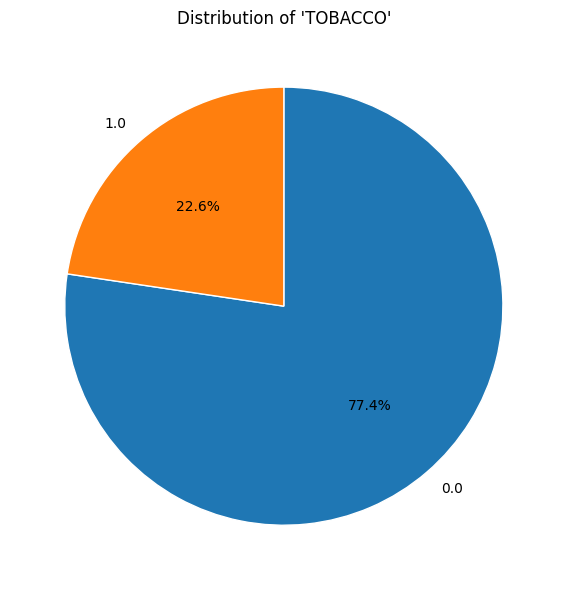

In [380]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_pie(df: pd.DataFrame, column: str, title: str = None, figsize=(6,6)):
    """
    Plots a pie chart of the value counts of a specified DataFrame column.
    
    Parameters
    ----------
    df : pd.DataFrame
        The DataFrame containing the data.
    column : str
        The name of the column to plot.
    title : str, optional
        Title for the chart; if None, uses the column name.
    figsize : tuple, optional
        Figure size passed to matplotlib (width, height).
    """
    # Check that column exists
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame.")
    
    # Count occurrences of each unique value
    counts = df[column].value_counts(dropna=False)
    
    # Plot
    fig, ax = plt.subplots(figsize=figsize)
    counts.plot.pie(
        ax=ax,
        autopct='%1.1f%%',    # show percentages
        startangle=90,        # start from the top
        counterclock=False,   # clockwise direction
        wedgeprops={'edgecolor': 'white'}
    )
    
    # Formatting
    ax.set_ylabel('')  # hide the y-axis label
    ax.set_title(title or f"Distribution of '{column}'")
    plt.tight_layout()
    plt.show()
X = pd.DataFrame(X, columns=['PNEUMONIA', 'AGE', 'DIABETES', 'COPD','ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR',
       'OBESITY', 'RENAL_CHRONIC', 'TOBACCO'])
cols = list(X.columns)
for idx, col in enumerate(cols):
    print(idx+1,'.', col)
col = int(input('Enter index of column:'))
plot_pie(X,cols[col-1])

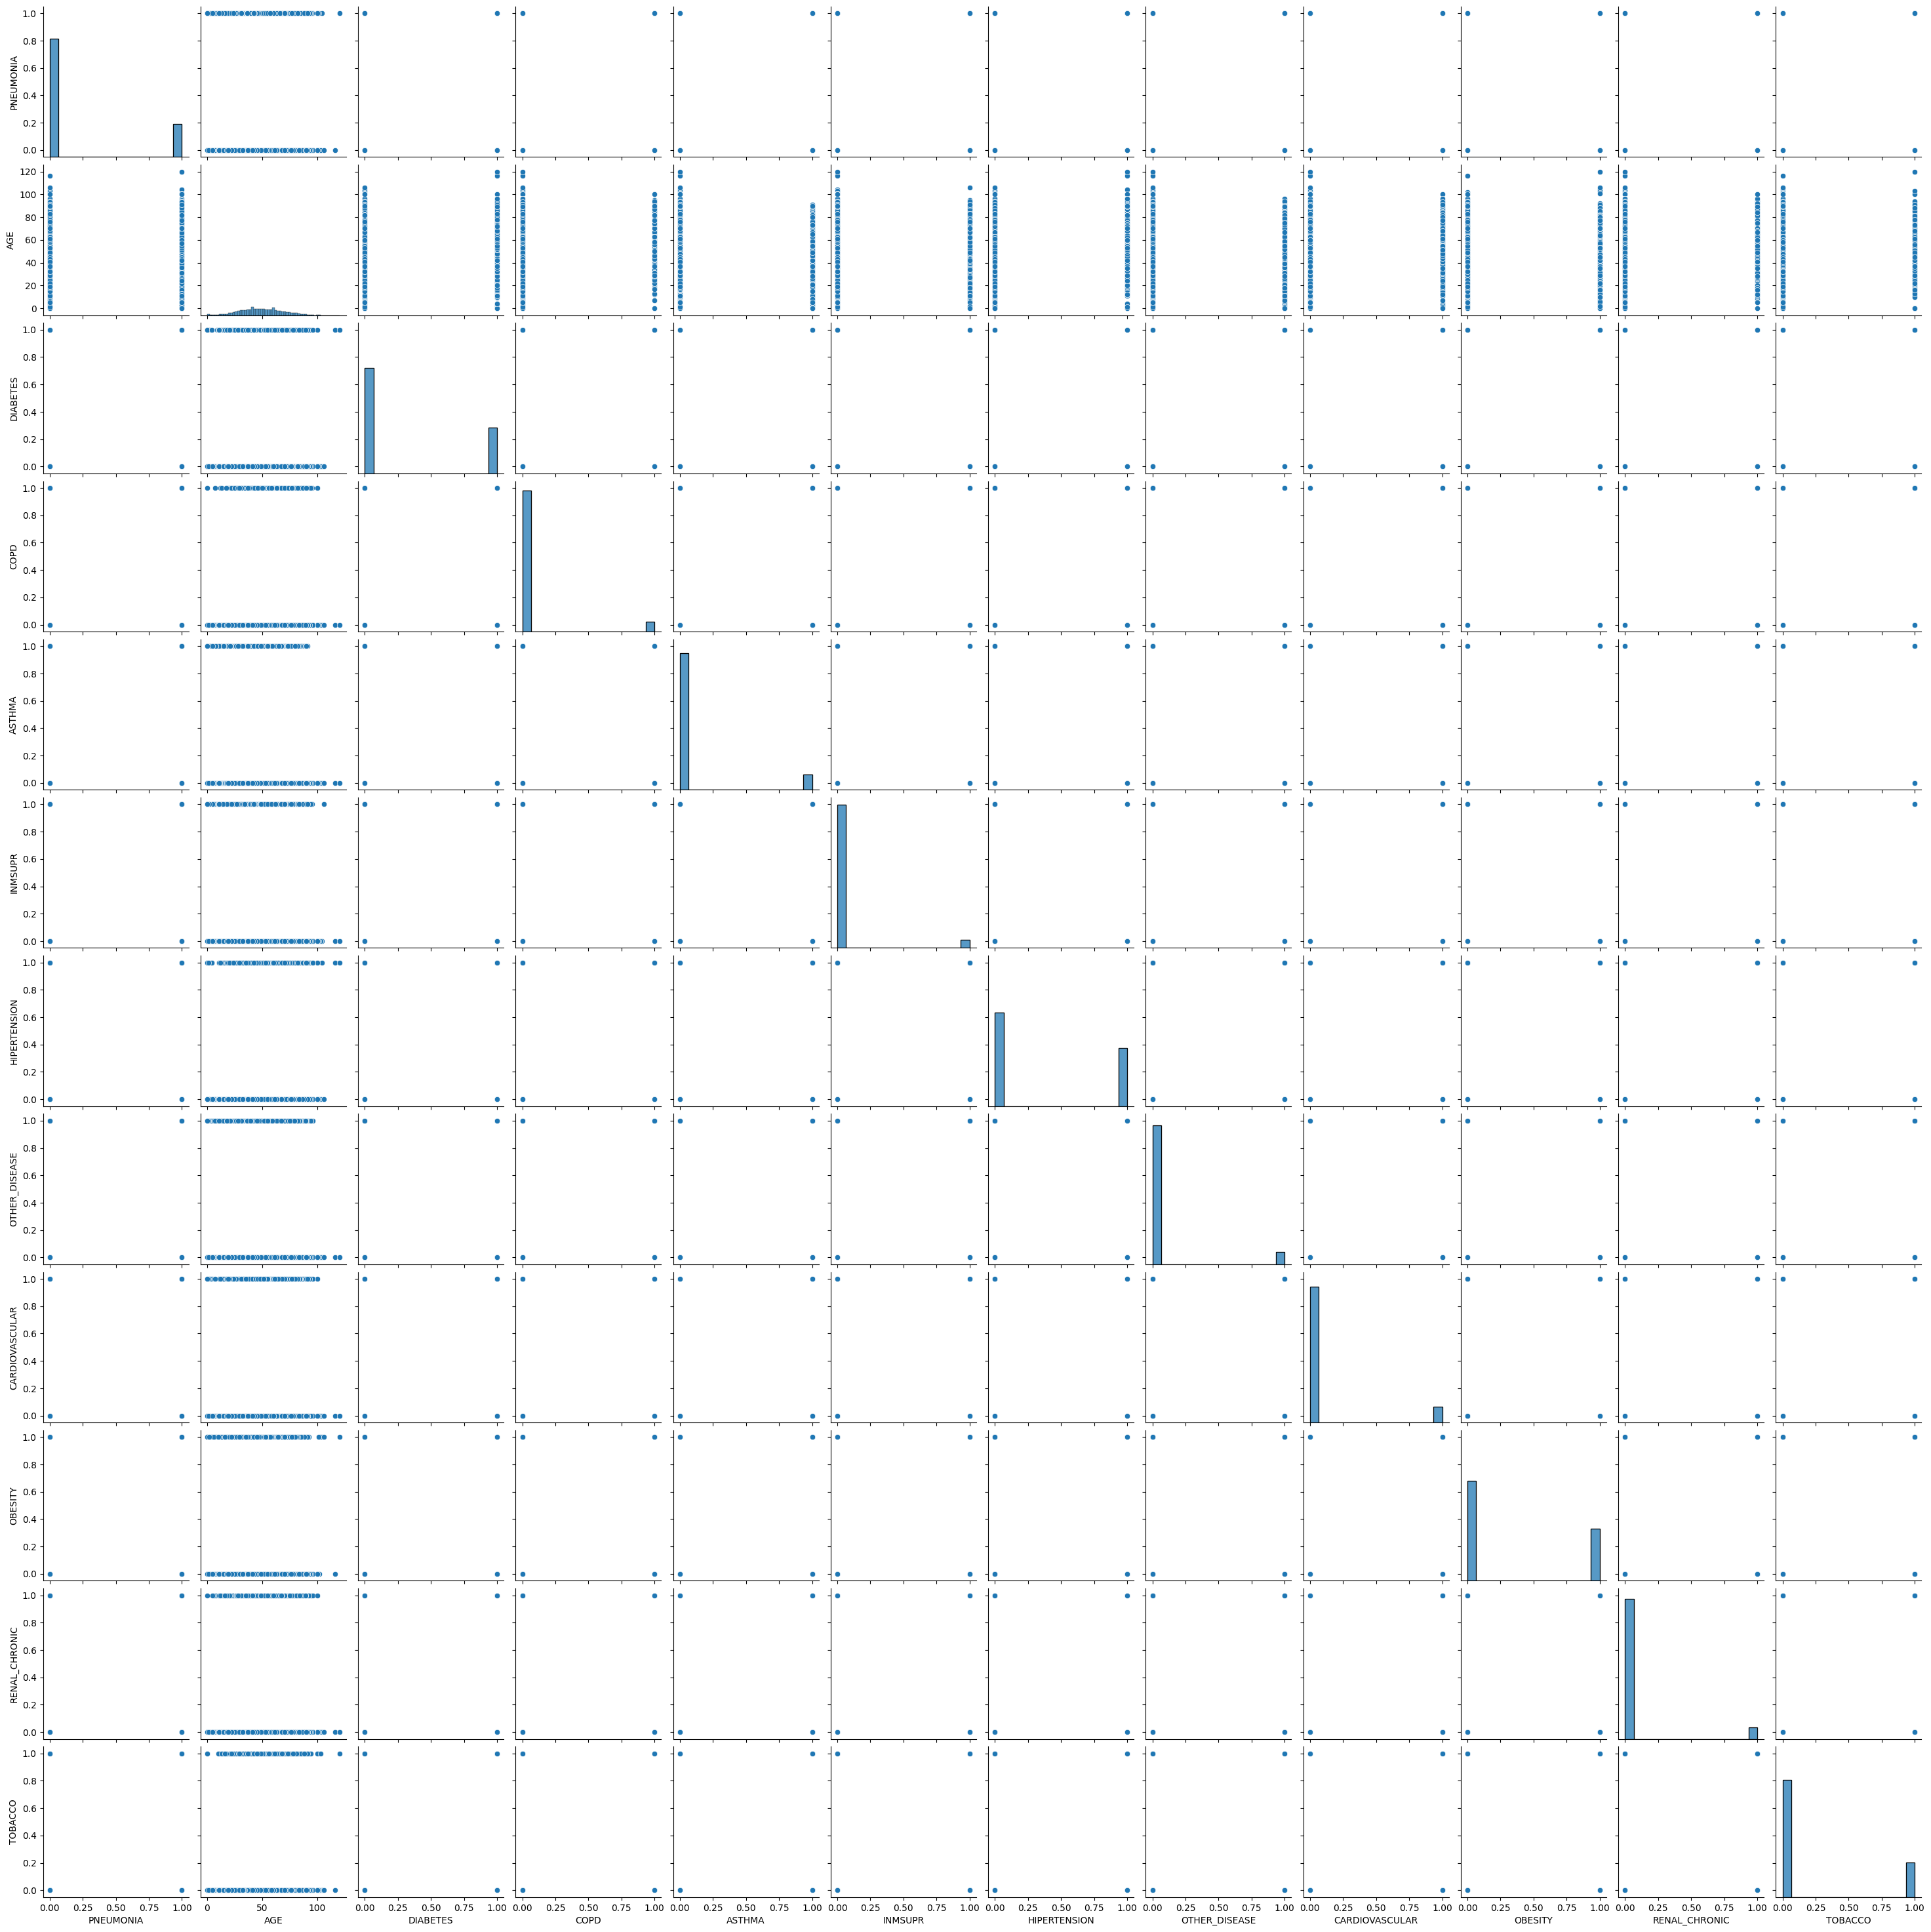

In [381]:
sns.pairplot(X)
plt.show()

In [371]:
mop.loc[mop[mop['COPD']==0].index, ['CLASIFFICATION_FINAL']].value_counts()

CLASIFFICATION_FINAL
3                       12499
1                        1189
Name: count, dtype: int64

In [387]:
from sklearn.decomposition import PCA
pca1 = PCA(2)
X = pca1.fit_transform(X)

In [388]:
X.shape[0] == mop.shape[0]

True

In [389]:
df1 = pd.concat([pd.DataFrame(X,columns=['0','1']),mop['CLASIFFICATION_FINAL']], axis=1)
df1.head()

,0,1,CLASIFFICATION_FINAL
0,18.870211,0.510225,3
1,5.858730,-0.591836,3
2,11.858437,-0.630634,3
3,4.858779,-0.585369,3
4,-19.140046,-0.430176,3


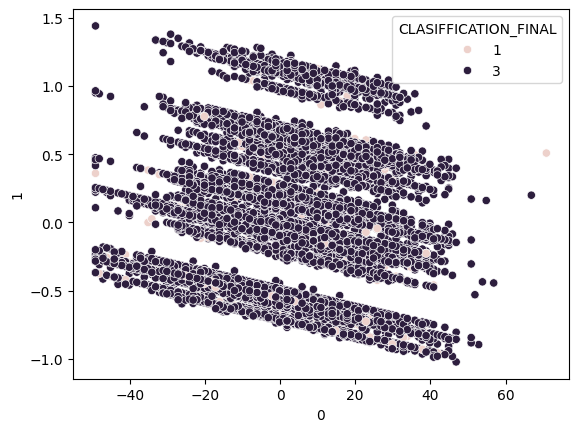

In [390]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(df1,x='0', y='1', hue='CLASIFFICATION_FINAL')
plt.show()

In [391]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [392]:
xtrain, xtest, ytrain, ytest = train_test_split(X, mop['CLASIFFICATION_FINAL'], test_size=0.2, random_state=42)
ytrain

750      3
11057    3
9219     3
12384    3
3746     3
        ..
5191     3
13418    3
5390     3
860      3
7270     3
Name: CLASIFFICATION_FINAL, Length: 11733, dtype: int64

In [393]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(xtrain, ytrain)

RandomForestClassifier(class_weight='balanced')

In [394]:
yp = rf.predict(xtest)
print(accuracy_score(y_pred=yp, y_true=ytest))
print(confusion_matrix(y_pred=yp, y_true=ytest))
print(classification_report(y_pred=yp, y_true=ytest))

0.7723244717109747
[[ 112  144]
 [ 524 2154]]
              precision    recall  f1-score   support

           1       0.18      0.44      0.25       256
           3       0.94      0.80      0.87      2678

    accuracy                           0.77      2934
   macro avg       0.56      0.62      0.56      2934
weighted avg       0.87      0.77      0.81      2934



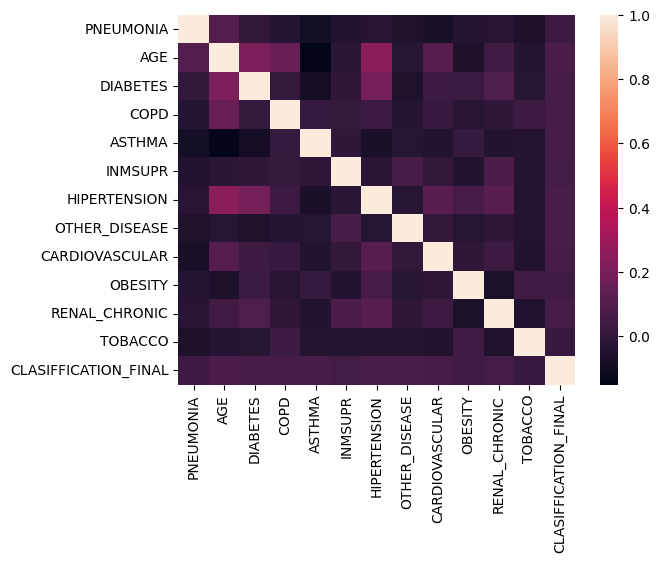

In [348]:
cor = mop.corr()
sns.heatmap(cor)
plt.show()

In [349]:
cors = [mop[i].corr(mop['CLASIFFICATION_FINAL']) for i in ['PNEUMONIA', 'AGE', 'DIABETES', 'COPD',
       'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR',
       'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']]
cors

[np.float64(0.03050187258066399),
 np.float64(0.08102681767240298),
 np.float64(0.062191560727749375),
 np.float64(0.061241740535386426),
 np.float64(0.06320747644439209),
 np.float64(0.052034608469475295),
 np.float64(0.07280901926895837),
 np.float64(0.07147428295757347),
 np.float64(0.06692576579306973),
 np.float64(0.03850619828199222),
 np.float64(0.05919786125750273),
 np.float64(0.01749493223256623)]